## YOLOn8 커스텀 모델링

라이브러리 설치

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 34.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

구글 드라이브 마운트

데이터셋을 구글드라이브에서 코랩 로컬 디스크로 복사

data.yaml 작성

In [ ]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
print("구글 드라이브 마운트 완료")

# 데이터셋을 코랩 로컬 디스크로 복사
SOURCE_PATH = "/content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split"
DEST_PATH = "/content/dataset_temp"

# 기존 데이터 삭제 및 디렉토리 생성
!rm -rf "$DEST_PATH"
!mkdir -p "$DEST_PATH"

!echo "=== 데이터 복사 중입니다. 약 10GB로 10분 정도 소요될 수 있습니다. ==="
!cp -r "$SOURCE_PATH/part_01" "$DEST_PATH/"
!cp -r "$SOURCE_PATH/part_02" "$DEST_PATH/"
!cp -r "$SOURCE_PATH/part_14" "$DEST_PATH/"
!echo "데이터 복사 완료."

# data.yaml 파일 생성 (오류 방지)
yaml_content = """
train:
 - /content/dataset_temp/part_01
 - /content/dataset_temp/part_02
val:
 - /content/dataset_temp/part_14

nc: 6
names: ['정상', '토마토잿빛곰팡이병', '토마토흰가루병', '다량원소결핍(N)', '다량원소결핍(P)', '다량원소결핍(K)']
"""

with open('/content/data.yaml', 'w') as f:
    f.write(yaml_content)

print("data.yaml 파일 생성 완료.")

Mounted at /content/drive
구글 드라이브 마운트 완료
=== 데이터 복사 중입니다. 약 10GB로 10분 정도 소요될 수 있습니다. ===
^C
^C
데이터 복사 완료.
data.yaml 파일 생성 완료.


데이터 훈련(구글 드라이브에 결과저장)

In [ ]:
# ultralytics 라이브러리 설치
!pip install ultralytics

# 학습 시작
from ultralytics import YOLO
import os

# 모델 로드 (yolov8s.pt는 자동으로 다운로드됩니다)
model = YOLO('yolov8s.pt')

# 모델 훈련 시작
model.train(
    data='/content/data.yaml',  # 로컬 디스크의 data.yaml 파일을 사용
    epochs=50,
    imgsz=640,
    batch=16,
    project='/content/drive/MyDrive/tomato_disease_detection',
    name='yolov8s_test_run'
)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Mounted at /content/drive
구글 드라이브 마운트 성공!


Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_test_run3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               


  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768,

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 173.8±187.6 MB/s, size: 3386.7 KB)


train: Scanning /content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split/part_01... 5000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [1:51:53<00:00,  1.34s/it]

train: /content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split/part_02/1029573_20211129_2_2_b7_3_2_13_2_572.jpg: corrupt JPEG restored and saved
train: /content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split/part_02/1029574_20211129_2_2_b7_3_2_13_2_573.jpg: corrupt JPEG restored and saved
train: /content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split/part_02/1029575_20211129_2_2_b7_3_2_13_2_574.jpg: corrupt JPEG restored and saved
train: /content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split/part_02/1029576_20211129_2_2_b7_3_2_13_2_575.jpg: corrupt JPEG restored and saved
train: /content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split/part_02/1029577_20211129_2_2_b7_3_2_13_2_576.jpg: corrupt JPEG restored and saved
train: /content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split/part_02/1029578_20211129_2_2_b7_3_2_13_2_577.jpg: corrupt JPEG restored an

train: New cache created: /content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split/part_01.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 1.2±0.9 ms, read: 3.2±1.1 MB/s, size: 1932.1 KB)


val: Scanning /content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split/part_14... 424 images, 0 backgrounds, 0 corrupt: 100%|██████████| 424/424 [00:55<00:00,  7.70it/s]


val: New cache created: /content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split/part_14.cache
Plotting labels to /content/drive/MyDrive/tomato_disease_detection/yolov8s_test_run3/labels.jpg... 


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 51135 (\N{HANGUL SYLLABLE JAES}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralyt

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/tomato_disease_detection/yolov8s_test_run3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.48G      1.077      9.669      1.519         42        640:   1%|▏         | 4/313 [00:03<03:29,  1.47it/s]
       1/50      3.53G     0.7589      1.426      1.216         16        640: 100%|██████████| 313/313 [52:05<00:00,  9.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [04:03<00:00, 17.41s/it]

                   all        424        424          1     0.0354      0.518        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.68G     0.7969     0.7312      1.201         17        640: 100%|██████████| 313/313 [54:19<00:00, 10.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [03:47<00:00, 16.25s/it]

                   all        424        424          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.72G     0.8051     0.6928      1.197         19        640: 100%|██████████| 313/313 [54:31<00:00, 10.45s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [04:07<00:00, 17.68s/it]

                   all        424        424          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.75G     0.7894      0.645      1.186         21        640: 100%|██████████| 313/313 [53:25<00:00, 10.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [03:50<00:00, 16.43s/it]

                   all        424        424          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.79G     0.7506     0.6007      1.163         23        640: 100%|██████████| 313/313 [52:23<00:00, 10.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [04:01<00:00, 17.25s/it]

                   all        424        424          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.82G     0.7365     0.5685      1.151         33        640:  83%|████████▎ | 259/313 [45:28<07:43,  8.58s/it]

학습 재개 코드(중단된 경우)

- 학습이 중간에 끊겼을 때, 위에 저장한 last.pt파일을 불러와서 이어서 진행하는 코드

In [ ]:
from ultralytics import YOLO
from google.colab import drive
import os

# 구글 드라이브 마운트
drive.mount('/content/drive', force_remount=True)

# 저장된 last.pt 파일의 경로 설정
checkpoint_path = '/content/drive/MyDrive/tomato_disease_detection/yolov8s_test_run/weights/last.pt'

# 체크포인트가 존재하면 로드, 없으면 yolov8s.pt 로드
if os.path.exists(checkpoint_path):
    print(f"'{checkpoint_path}'에서 모델을 로드하여 학습을 이어서 진행합니다.")
    model = YOLO(checkpoint_path)
else:
    print("저장된 모델을 찾을 수 없습니다. yolov8s.pt 모델을 새로 로드합니다.")
    model = YOLO('yolov8s.pt')

# 훈련 시작 (epochs 값은 50으로 유지하면 됨)
model.train(
    data='/content/data.yaml',
    epochs=50,
    imgsz=640,
    project='/content/drive/MyDrive/tomato_disease_detection',
    name='yolov8s_test_run'
)

## claude

In [ ]:
# ===== 디스크 용량 확인 및 정리 =====
import os
import shutil
from pathlib import Path

def check_disk_usage():
    """디스크 사용량 확인"""
    total, used, free = shutil.disk_usage("/content")
    print(f"총 용량: {total // (2**30)} GB")
    print(f"사용 중: {used // (2**30)} GB")
    print(f"여유 공간: {free // (2**30)} GB")
    return free // (2**30)

def cleanup_space():
    """불필요한 파일 정리로 공간 확보"""
    print("=== 디스크 정리 시작 ===")

    # 캐시 정리
    !rm -rf /root/.cache/*
    !rm -rf /tmp/*

    # 이전 데이터셋 정리
    if os.path.exists("/content/dataset_temp"):
        shutil.rmtree("/content/dataset_temp")
        print("이전 dataset_temp 폴더 삭제 완료")

    print("디스크 정리 완료")
    check_disk_usage()

# 초기 디스크 상태 확인
print("=== 초기 디스크 상태 ===")
free_space = check_disk_usage()

if free_space < 30:  # 30GB 미만이면 정리
    cleanup_space()


=== 초기 디스크 상태 ===
총 용량: 112 GB
사용 중: 38 GB
여유 공간: 74 GB


In [ ]:
# ===== 구글 드라이브 마운트 및 데이터 준비 =====
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
print("구글 드라이브 마운트 완료")

# 경로 설정
SOURCE_PATH = "/content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split"
DEST_PATH = "/content/dataset_temp"

# 디렉토리 생성
os.makedirs(DEST_PATH, exist_ok=True)

print("=== 선택된 데이터 복사 중 (약 15GB, 5-10분 소요) ===")

# 효율적인 복사 (진행상황 표시)
def copy_with_progress(src, dst, part_name):
    """진행상황을 보여주는 복사 함수"""
    print(f"{part_name} 복사 시작...")
    !cp -r "$src" "$dst"
    print(f"{part_name} 복사 완료!")

    # 복사 후 용량 확인
    if os.path.exists(f"{dst}/{part_name}"):
        size = sum(f.stat().st_size for f in Path(f"{dst}/{part_name}").rglob('*') if f.is_file())
        print(f"{part_name} 크기: {size / (2**30):.2f} GB")

# 데이터 복사
try:
    copy_with_progress(f"{SOURCE_PATH}/part_01", DEST_PATH, "part_01")
    copy_with_progress(f"{SOURCE_PATH}/part_02", DEST_PATH, "part_02")
    copy_with_progress(f"{SOURCE_PATH}/part_14", DEST_PATH, "part_14")

    print("모든 데이터 복사 완료!")

    # 복사 후 디스크 상태 확인
    print("\n=== 복사 후 디스크 상태 ===")
    check_disk_usage()

except Exception as e:
    print(f"데이터 복사 중 오류 발생: {e}")
    print("디스크 공간이 부족할 수 있습니다.")

# 데이터셋 통계 확인
def check_dataset_stats(path):
    """데이터셋 통계 확인"""
    total_images = 0
    total_labels = 0

    for part_dir in ['part_01', 'part_02', 'part_14']:
        part_path = os.path.join(path, part_dir)
        if os.path.exists(part_path):
            images = len([f for f in os.listdir(part_path) if f.endswith(('.jpg', '.jpeg', '.png'))])
            labels = len([f for f in os.listdir(part_path) if f.endswith('.txt')])
            print(f"{part_dir}: 이미지 {images}개, 라벨 {labels}개")
            total_images += images
            total_labels += labels

    print(f"총 이미지: {total_images}개, 총 라벨: {total_labels}개")
    return total_images, total_labels

check_dataset_stats(DEST_PATH)

# data.yaml 파일 생성
yaml_content = f"""train:
  - {DEST_PATH}/part_01
  - {DEST_PATH}/part_02

val:
  - {DEST_PATH}/part_14

nc: 6
names: ['정상', '토마토잿빛곰팡이병', '토마토흰가루병', '다량원소결핍(N)', '다량원소결핍(P)', '다량원소결핍(K)']
"""

with open('/content/data.yaml', 'w', encoding='utf-8') as f:
    f.write(yaml_content)

print("data.yaml 파일 생성 완료")


Mounted at /content/drive
구글 드라이브 마운트 완료
=== 선택된 데이터 복사 중 (약 15GB, 5-10분 소요) ===
part_01 복사 시작...
part_01 복사 완료!
part_01 크기: 11.56 GB
part_02 복사 시작...
part_02 복사 완료!
part_02 크기: 12.37 GB
part_14 복사 시작...
part_14 복사 완료!
part_14 크기: 0.77 GB
모든 데이터 복사 완료!

=== 복사 후 디스크 상태 ===
총 용량: 112 GB
사용 중: 72 GB
여유 공간: 39 GB
part_01: 이미지 2500개, 라벨 2500개
part_02: 이미지 2500개, 라벨 2500개
part_14: 이미지 424개, 라벨 424개
총 이미지: 5424개, 총 라벨: 5424개
data.yaml 파일 생성 완료


In [ ]:
# ===== YOLOv8 설치 및 학습 =====
!pip install ultralytics

from ultralytics import YOLO
import torch

# GPU 및 메모리 확인
print(f"\n=== 시스템 정보 ===")
print(f"CUDA 사용 가능: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU 메모리: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

# 메모리 정리
torch.cuda.empty_cache()

# 모델 로드
model = YOLO('yolov8s.pt')
print("YOLOv8s 모델 로드 완료")

# 프로젝트 디렉토리 확인
project_dir = '/content/drive/MyDrive/tomato_disease_detection'
os.makedirs(project_dir, exist_ok=True)

# 최적화된 학습 파라미터 (디스크 용량 고려)
print("\n=== 모델 훈련 시작 ===")
results = model.train(
    data='/content/data.yaml',
    epochs=50,           # 적절한 에포크 수
    imgsz=640,
    batch=16,            # GPU 메모리에 따라 조정 가능 (8, 16, 32)
    device=0,
    project=project_dir,
    name='yolov8s_tomato_disease',

    # 저장 및 검증 설정
    save=True,
    save_period=5,       # 5 에포크마다 저장 (디스크 용량 고려)
    val=True,            # 매 에포크 검증 수행
    plots=True,

    # 최적화 파라미터
    patience=15,         # 조기 종료
    optimizer='AdamW',
    lr0=0.01,
    warmup_epochs=3,

    # 손실 함수 가중치
    box=7.5,
    cls=0.5,
    dfl=1.5,

    exist_ok=True
)

print("훈련 완료!")

# 최종 결과 요약
def training_summary():
    """훈련 결과 요약"""
    weights_dir = f"{project_dir}/yolov8s_tomato_disease/weights"

    if os.path.exists(f"{weights_dir}/best.pt"):
        print(f"\n=== 훈련 완료 ===")
        print(f"최고 성능 모델: {weights_dir}/best.pt")
        print(f"최종 모델: {weights_dir}/last.pt")

        # 모델 파일 크기 확인
        best_size = os.path.getsize(f"{weights_dir}/best.pt") / (2**20)  # MB
        last_size = os.path.getsize(f"{weights_dir}/last.pt") / (2**20)  # MB
        print(f"best.pt 크기: {best_size:.1f} MB")
        print(f"last.pt 크기: {last_size:.1f} MB")

        # 최종 디스크 사용량
        print(f"\n=== 최종 디스크 상태 ===")
        check_disk_usage()

training_summary()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 643.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

YOLOv8s 모델 로드 완료

=== 모델 훈련 시작 ===
Ultralytics 8.3.174 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_tomato_disease, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=15, perspective=

Overriding model.yaml nc=80 with nc=6

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768, 256, 1]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 15                  -1  1    148224  ultralytics.nn.modules.block.C2f             [384, 128, 1]                 
 16                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128,

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 203.3±31.6 MB/s, size: 5010.6 KB)


train: Scanning /content/dataset_temp/part_01... 5000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:12<00:00, 402.47it/s]


train: New cache created: /content/dataset_temp/part_01.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.1±0.1 ms, read: 127.3±50.5 MB/s, size: 1932.1 KB)


val: Scanning /content/dataset_temp/part_14... 424 images, 0 backgrounds, 0 corrupt: 100%|██████████| 424/424 [00:01<00:00, 265.23it/s]

val: New cache created: /content/dataset_temp/part_14.cache


Plotting labels to /content/drive/MyDrive/tomato_disease_detection/yolov8s_tomato_disease/labels.jpg... 


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/plotting.py:618: UserWarning: Glyph 51135 (\N{HANGUL SYLLABLE JAES}) missing from font(s) DejaVu Sans.
  plt.savefig(fname, dpi=200)
/usr/local/lib/python3.11/dist-packages/ultralyt

optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/tomato_disease_detection/yolov8s_tomato_disease
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.64G      1.022      9.418      1.476         42        640:   1%|          | 3/313 [00:04<07:03,  1.37s/it]
       1/50      3.69G       1.14      1.469      1.431         16        640: 100%|██████████| 313/313 [10:50<00:00,  2.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:44<00:00,  3.20s/it]

                   all        424        424          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.84G      1.146      1.093      1.396         17        640: 100%|██████████| 313/313 [11:09<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:44<00:00,  3.15s/it]

                   all        424        424          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.88G      1.062     0.9493      1.336         46        640:  77%|███████▋  | 242/313 [08:46<02:34,  2.17s/it]


KeyboardInterrupt: 

In [ ]:
# ===== 학습 재개 코드 (별도 셀에서 실행) =====
def resume_training():
    """학습 재개 함수"""
    from google.colab import drive
    from ultralytics import YOLO
    import torch

    # 구글 드라이브 마운트
    drive.mount('/content/drive', force_remount=True)

    # 디스크 공간 및 데이터 확인
    if not os.path.exists('/content/data.yaml'):
        print("❌ data.yaml이 없습니다. 데이터 준비를 먼저 실행하세요.")
        return

    if not os.path.exists('/content/dataset_temp'):
        print("❌ 데이터셋이 없습니다. 데이터 복사를 먼저 실행하세요.")
        return

    # 체크포인트 확인
    checkpoint_path = '/content/drive/MyDrive/tomato_disease_detection/yolov8s_tomato_disease/weights/last.pt'

    if os.path.exists(checkpoint_path):
        print(f"✅ 저장된 모델에서 학습을 재개합니다: {checkpoint_path}")
        model = YOLO(checkpoint_path)
    else:
        print("❌ 저장된 모델을 찾을 수 없습니다. 처음부터 시작합니다.")
        model = YOLO('yolov8s.pt')

    # GPU 메모리 정리
    torch.cuda.empty_cache()

    # 훈련 재개
    results = model.train(
        data='/content/data.yaml',
        epochs=50,  # 남은 에포크 자동 계산됨
        imgsz=640,
        batch=16,
        device=0,
        project='/content/drive/MyDrive/tomato_disease_detection',
        name='yolov8s_tomato_disease',
        resume=True,  # 재개 모드
        exist_ok=True
    )

    return results

# ===== 간단한 평가 및 테스트 =====
def quick_evaluation():
    """빠른 모델 평가"""
    best_model_path = '/content/drive/MyDrive/tomato_disease_detection/yolov8s_tomato_disease/weights/best.pt'

    if os.path.exists(best_model_path):
        model = YOLO(best_model_path)

        # 검증 세트로 평가
        results = model.val(data='/content/data.yaml', device=0)

        print(f"\n=== 모델 성능 ===")
        print(f"mAP@0.5: {results.box.map50:.4f}")
        print(f"mAP@0.5:0.95: {results.box.map:.4f}")

        # 클래스별 성능 (있는 경우)
        if hasattr(results.box, 'ap_class_index'):
            class_names = ['정상', '토마토잿빛곰팡이병', '토마토흰가루병',
                          '다량원소결핍(N)', '다량원소결핍(P)', '다량원소결핍(K)']
            print(f"\n=== 클래스별 성능 ===")
            for i, name in enumerate(class_names):
                if i < len(results.box.ap):
                    print(f"{name}: {results.box.ap[i]:.4f}")
    else:
        print("❌ best.pt 모델을 찾을 수 없습니다.")

# 사용법 안내
print(f"""
=== 사용법 안내 ===
1. 학습 중단 시: resume_training() 실행
2. 모델 평가: quick_evaluation() 실행
3. 디스크 정리: cleanup_space() 실행

주의사항:
- 코랩 연결이 끊어지면 /content 데이터는 사라집니다
- 학습 재개 시 데이터를 다시 복사해야 할 수 있습니다
- 디스크 용량을 주기적으로 확인하세요
""")

In [ ]:
# part_14 전용 진단
def diagnose_part14():
    """part_14 전용 상세 진단"""
    print("=== part_14 전용 진단 ===")

    dataset_path = "/content/dataset_temp"
    part_14_path = f"{dataset_path}/part_14"

    if not os.path.exists(part_14_path):
        print("❌ part_14 폴더 없음")
        return

    # part_14 파일 찾기
    images_14 = []
    labels_14 = []

    for root, dirs, files in os.walk(part_14_path):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):
                images_14.append(os.path.join(root, file))
            elif file.endswith('.txt'):
                labels_14.append(os.path.join(root, file))

    print(f"part_14: 이미지 {len(images_14)}개, 라벨 {len(labels_14)}개")

    # 모든 라벨 파일 분석
    class_counts_14 = {}
    problem_files = []

    for label_file in labels_14:
        try:
            with open(label_file, 'r') as f:
                lines = f.readlines()

            if not lines:  # 빈 파일
                problem_files.append(f"{label_file} - 빈 파일")
                continue

            for line in lines:
                line = line.strip()
                if not line:
                    continue

                parts = line.split()
                if len(parts) != 5:
                    problem_files.append(f"{label_file} - 형식 오류")
                    continue

                try:
                    class_id = int(parts[0])
                    class_counts_14[class_id] = class_counts_14.get(class_id, 0) + 1
                except ValueError:
                    problem_files.append(f"{label_file} - 숫자 변환 오류")

        except Exception as e:
            problem_files.append(f"{label_file} - 읽기 오류: {e}")

    print(f"\n=== part_14 클래스 분포 ===")
    for class_id in range(6):
        count = class_counts_14.get(class_id, 0)
        print(f"클래스 {class_id}: {count}개")

    if problem_files:
        print(f"\n❌ part_14 문제 파일들:")
        for issue in problem_files[:10]:  # 처음 10개만
            print(f"  - {issue}")

    return class_counts_14, problem_files

# part_01과 part_14 비교
diagnose_part14()

=== part_14 전용 진단 ===
part_14: 이미지 424개, 라벨 424개

=== part_14 클래스 분포 ===
클래스 0: 0개
클래스 1: 424개
클래스 2: 0개
클래스 3: 0개
클래스 4: 0개
클래스 5: 0개


({1: 424}, [])

In [ ]:
# ===== 클래스별 균등 데이터셋 생성 =====
import os
import shutil
import random
from collections import defaultdict

def collect_all_classes():
    """모든 part에서 클래스별로 파일들 수집"""
    print("=== 모든 클래스 파일 수집 ===")

    source_base = "/content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split"

    # 클래스별 파일 목록 저장
    class_files = defaultdict(list)  # {class_id: [(img_path, txt_path), ...]}

    # 모든 part 스캔
    all_parts = [item for item in os.listdir(source_base)
                 if item.startswith('part_') and os.path.isdir(os.path.join(source_base, item))]

    print(f"스캔할 Part: {sorted(all_parts)}")

    for part in sorted(all_parts):
        print(f"📂 {part} 스캔 중...")
        part_path = os.path.join(source_base, part)

        for root, dirs, files in os.walk(part_path):
            for file in files:
                if file.endswith('.txt'):
                    txt_path = os.path.join(root, file)

                    # 대응하는 이미지 파일 찾기
                    img_extensions = ['.jpg', '.jpeg', '.png']
                    img_path = None

                    for ext in img_extensions:
                        potential_img = txt_path.replace('.txt', ext)
                        if os.path.exists(potential_img):
                            img_path = potential_img
                            break

                    if img_path is None:
                        continue  # 이미지가 없으면 스킵

                    # txt 파일에서 클래스 추출
                    try:
                        with open(txt_path, 'r') as f:
                            for line in f:
                                line = line.strip()
                                if line:
                                    parts = line.split()
                                    if len(parts) >= 1:
                                        class_id = int(parts[0])
                                        class_files[class_id].append((img_path, txt_path))
                                        break  # 첫 번째 객체의 클래스만 사용
                    except:
                        continue

    # 클래스별 통계
    print(f"\n=== 클래스별 수집 결과 ===")
    class_names = ['정상', '토마토잿빛곰팡이병', '토마토흰가루병', '다량원소결핍(N)', '다량원소결핍(P)', '다량원소결핍(K)']

    for class_id in range(6):
        count = len(class_files[class_id])
        name = class_names[class_id]
        status = "✅" if count > 0 else "❌"
        print(f"클래스 {class_id} ({name}): {count}개 {status}")

    return class_files

def create_custom_balanced_dataset(class_files):
    """사용자 지정 균등 데이터셋 생성: train 400개/val 50개 per class"""
    print(f"\n=== 사용자 지정 균등 데이터셋 생성 ===")
    print(f"📋 구성:")
    print(f"  - Train: 클래스별 400개 (newpart_01: 200개 + newpart_02: 200개)")
    print(f"  - Val: 클래스별 50개 (newpart_03)")
    print(f"  - 총: Train 2,400개 + Val 300개 = 2,700개")

    # 클래스별 필요한 샘플 수 확인
    train_per_class = 400  # 200 + 200
    val_per_class = 50
    total_per_class = train_per_class + val_per_class

    missing_classes = []
    insufficient_classes = []

    for class_id in range(6):
        available = len(class_files[class_id])

        if available == 0:
            missing_classes.append(class_id)
        elif available < total_per_class:
            insufficient_classes.append((class_id, available, total_per_class))

    if missing_classes:
        print(f"❌ 누락된 클래스: {missing_classes}")
        return None

    if insufficient_classes:
        print(f"⚠️ 부족한 클래스:")
        for class_id, available, needed in insufficient_classes:
            print(f"  클래스 {class_id}: 필요 {needed}개, 보유 {available}개")

        print(f"해결 방법:")
        print(f"1. 부족한 클래스는 중복 사용")
        print(f"2. 전체 샘플 수 줄이기")

        # 자동으로 중복 사용하도록 진행
        print(f"→ 중복 사용으로 자동 진행")

    # 각 클래스에서 샘플 분할
    selected_data = {}

    for class_id in range(6):
        available_files = class_files[class_id].copy()
        random.shuffle(available_files)

        needed = total_per_class

        if len(available_files) >= needed:
            # 충분한 경우
            selected = available_files[:needed]
        else:
            # 부족한 경우: 중복 사용
            selected = available_files.copy()
            while len(selected) < needed:
                remaining = needed - len(selected)
                additional = available_files[:min(remaining, len(available_files))]
                selected.extend(additional)

        # train/val 분할
        train_files = selected[:train_per_class]
        val_files = selected[train_per_class:train_per_class + val_per_class]

        # newpart 분할 (train을 200개씩 2개로)
        newpart_01 = train_files[:200]
        newpart_02 = train_files[200:400]
        newpart_03 = val_files

        selected_data[class_id] = {
            'newpart_01': newpart_01,
            'newpart_02': newpart_02,
            'newpart_03': newpart_03
        }

        print(f"클래스 {class_id}: newpart_01({len(newpart_01)}), newpart_02({len(newpart_02)}), newpart_03({len(newpart_03)})")

    return selected_data

def copy_custom_dataset(selected_data):
    """사용자 지정 구조로 데이터셋 복사"""
    print(f"\n=== 사용자 지정 구조로 복사 ===")

    dest_base = "/content/dataset_custom"

    # 디렉토리 생성
    if os.path.exists(dest_base):
        shutil.rmtree(dest_base)

    for part in ['newpart_01', 'newpart_02', 'newpart_03']:
        os.makedirs(f"{dest_base}/{part}", exist_ok=True)

    # 복사 통계
    copy_stats = {'newpart_01': 0, 'newpart_02': 0, 'newpart_03': 0}

    for class_id, parts_data in selected_data.items():
        print(f"\n📂 클래스 {class_id} 복사 중...")

        for part_name, files in parts_data.items():
            part_dir = f"{dest_base}/{part_name}"

            for i, (img_path, txt_path) in enumerate(files):
                try:
                    # 파일명: class{클래스}_{순번}
                    base_name = f"class{class_id}_{i:03d}"
                    img_ext = os.path.splitext(img_path)[1]

                    new_img = f"{part_dir}/{base_name}{img_ext}"
                    new_txt = f"{part_dir}/{base_name}.txt"

                    shutil.copy2(img_path, new_img)
                    shutil.copy2(txt_path, new_txt)
                    copy_stats[part_name] += 1

                except Exception as e:
                    print(f"    복사 실패 {part_name}: {e}")

            print(f"  {part_name}: {len(files)}개 완료")

    print(f"\n🎉 전체 복사 완료!")
    for part_name, count in copy_stats.items():
        print(f"{part_name}: {count}개")

    # data.yaml 생성
    yaml_content = f"""train:
  - /content/dataset_custom/newpart_01
  - /content/dataset_custom/newpart_02

val:
  - /content/dataset_custom/newpart_03

nc: 6
names: ['정상', '토마토잿빛곰팡이병', '토마토흰가루병', '다량원소결핍(N)', '다량원소결핍(P)', '다량원소결핍(K)']
"""

    with open('/content/data_custom.yaml', 'w', encoding='utf-8') as f:
        f.write(yaml_content)

    print(f"✅ data_custom.yaml 생성 완료!")

    # 최종 검증
    print(f"\n=== 최종 데이터셋 구조 ===")
    for part in ['newpart_01', 'newpart_02', 'newpart_03']:
        part_dir = f"{dest_base}/{part}"
        img_count = len([f for f in os.listdir(part_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])
        txt_count = len([f for f in os.listdir(part_dir) if f.endswith('.txt')])
        print(f"{part}: 이미지 {img_count}개, 라벨 {txt_count}개")

        if part in ['newpart_01', 'newpart_02']:
            role = "Train"
        else:
            role = "Val"
        print(f"  → {role} 데이터")

    total_train = copy_stats['newpart_01'] + copy_stats['newpart_02']
    total_val = copy_stats['newpart_03']
    print(f"\n📊 총계: Train {total_train}개, Val {total_val}개")

    return True

def create_perfect_dataset():
    """완벽한 사용자 지정 데이터셋 생성"""
    print("🎯 완벽한 균등 데이터셋 생성!")
    print("📋 구성: Train 2,400개(newpart_01+02) + Val 300개(newpart_03)")

    # 1단계: 모든 클래스 수집
    class_files = collect_all_classes()

    if not class_files:
        print("❌ 데이터 수집 실패")
        return False

    # 2단계: 사용자 지정 분할
    selected = create_custom_balanced_dataset(class_files)

    if selected is None:
        print("❌ 데이터 분할 실패")
        return False

    # 3단계: 복사
    success = copy_custom_dataset(selected)

    if success:
        print(f"\n" + "="*60)
        print("🎉 완벽한 균등 데이터셋 완성!")
        print("="*60)
        print("📊 최종 구성:")
        print("  🔹 newpart_01: 1,200개 (각 클래스 200개) - Train")
        print("  🔹 newpart_02: 1,200개 (각 클래스 200개) - Train")
        print("  🔹 newpart_03: 300개 (각 클래스 50개) - Val")
        print("  🔹 총계: Train 2,400개 + Val 300개 = 2,700개")
        print()
        print("✅ 장점:")
        print("  - 모든 클래스가 train/val에 균등 분포")
        print("  - mAP 계산 완벽하게 작동")
        print("  - 용량 절약 (~8-10GB)")
        print("  - 학습 효율성 최적화")
        print()
        print("🚀 학습 시작: data_custom.yaml 사용")

    return success

# 실행 가이드
print("🎯 **사용자 지정 완벽 구성**")
print("Train: newpart_01(1,200) + newpart_02(1,200) = 2,400개")
print("Val: newpart_03(300개)")
print("클래스별 균등: Train 400개/Val 50개")
print()
print("💡 데이터 양 충분성: ✅ 완벽!")
print("  - YOLOv8s 권장량 충족")
print("  - 클래스별 400개(train)는 충분")
print("  - 50개(val)도 mAP 계산에 적정")
print()
print("🚀 바로 실행:")
print("create_perfect_dataset()")

🎯 **사용자 지정 완벽 구성**
Train: newpart_01(1,200) + newpart_02(1,200) = 2,400개
Val: newpart_03(300개)
클래스별 균등: Train 400개/Val 50개

💡 데이터 양 충분성: ✅ 완벽!
  - YOLOv8s 권장량 충족
  - 클래스별 400개(train)는 충분
  - 50개(val)도 mAP 계산에 적정

🚀 바로 실행:
create_perfect_dataset()


In [ ]:
create_perfect_dataset()

🎯 완벽한 균등 데이터셋 생성!
📋 구성: Train 2,400개(newpart_01+02) + Val 300개(newpart_03)
=== 모든 클래스 파일 수집 ===
스캔할 Part: ['part_01', 'part_02', 'part_03', 'part_04', 'part_05', 'part_06', 'part_07', 'part_08', 'part_09', 'part_10', 'part_11', 'part_12', 'part_13', 'part_14']
📂 part_01 스캔 중...
📂 part_02 스캔 중...
📂 part_03 스캔 중...
📂 part_04 스캔 중...
📂 part_05 스캔 중...
📂 part_06 스캔 중...
📂 part_07 스캔 중...
📂 part_08 스캔 중...
📂 part_09 스캔 중...
📂 part_10 스캔 중...
📂 part_11 스캔 중...
📂 part_12 스캔 중...
📂 part_13 스캔 중...
📂 part_14 스캔 중...

=== 클래스별 수집 결과 ===
클래스 0 (정상): 0개 ❌
클래스 1 (토마토잿빛곰팡이병): 11670개 ✅
클래스 2 (토마토흰가루병): 9172개 ✅
클래스 3 (다량원소결핍(N)): 1596개 ✅
클래스 4 (다량원소결핍(P)): 3458개 ✅
클래스 5 (다량원소결핍(K)): 3543개 ✅

=== 사용자 지정 균등 데이터셋 생성 ===
📋 구성:
  - Train: 클래스별 400개 (newpart_01: 200개 + newpart_02: 200개)
  - Val: 클래스별 50개 (newpart_03)
  - 총: Train 2,400개 + Val 300개 = 2,700개
❌ 누락된 클래스: [0]
❌ 데이터 분할 실패


False

In [ ]:
# ===== 효율적인 5개 클래스 데이터셋 생성 (한 번 스캔으로 모든 클래스 수집) =====

def efficient_5class_dataset():
    """한 번 스캔으로 모든 클래스 동시 수집"""
    print("🚀 초효율 5개 클래스 데이터셋 생성!")
    print("💡 한 번 스캔으로 모든 클래스 동시 수집")

    import os
    import shutil
    import random
    from collections import defaultdict

    source_base = "/content/drive/My Drive/detecting_disease&undernourishment(YOLO)/dataset_split"
    dest_base = "/content/dataset_5class"

    # 디렉토리 생성
    if os.path.exists(dest_base):
        shutil.rmtree(dest_base)

    for part in ['newpart_01', 'newpart_02', 'newpart_03']:
        os.makedirs(f"{dest_base}/{part}", exist_ok=True)

    # 클래스별 수집 목표 및 현재 상태
    active_classes = [1, 2, 3, 4, 5]
    target_per_class = 450
    collected_files = {class_id: [] for class_id in active_classes}

    print(f"📋 목표: 각 클래스별 {target_per_class}개씩 수집")

    # 한 번 스캔으로 모든 클래스 수집
    total_collected = 0

    for part_num in range(1, 15):  # part_01 ~ part_14
        part_name = f"part_{part_num:02d}"
        part_path = os.path.join(source_base, part_name)

        if not os.path.exists(part_path):
            continue

        print(f"📂 {part_name} 스캔 중...", end=" ")

        # 이 part에서 수집한 클래스별 개수
        part_collected = {class_id: 0 for class_id in active_classes}

        # 모든 클래스가 목표에 도달했는지 확인
        all_completed = all(len(collected_files[class_id]) >= target_per_class for class_id in active_classes)
        if all_completed:
            print("✅ 모든 클래스 목표 달성!")
            break

        for root, dirs, files in os.walk(part_path):
            for file in files:
                if file.endswith('.txt'):
                    txt_path = os.path.join(root, file)

                    # 이미지 파일 확인
                    img_path = None
                    for ext in ['.jpg', '.jpeg', '.png']:
                        potential_img = txt_path.replace('.txt', ext)
                        if os.path.exists(potential_img):
                            img_path = potential_img
                            break

                    if img_path is None:
                        continue

                    # 클래스 확인
                    try:
                        with open(txt_path, 'r') as f:
                            first_line = f.readline().strip()
                            if first_line:
                                parts = first_line.split()
                                if len(parts) >= 1:
                                    class_id = int(parts[0])

                                    # 원하는 클래스이고 아직 목표에 도달하지 않았다면
                                    if (class_id in active_classes and
                                        len(collected_files[class_id]) < target_per_class):

                                        collected_files[class_id].append((img_path, txt_path))
                                        part_collected[class_id] += 1
                                        total_collected += 1
                    except:
                        continue

        # 이 part에서 수집한 결과 출력
        part_summary = [f"클래스{cid}:{count}" for cid, count in part_collected.items() if count > 0]
        print(f"{', '.join(part_summary) if part_summary else '0개'}")

    # 수집 결과 요약
    print(f"\n📊 수집 완료!")
    for class_id in active_classes:
        count = len(collected_files[class_id])
        status = "✅" if count >= 400 else "⚠️"
        print(f"클래스 {class_id}: {count}개 {status}")

    # 데이터셋 생성
    copy_stats = {'newpart_01': 0, 'newpart_02': 0, 'newpart_03': 0}

    for class_id in active_classes:
        files = collected_files[class_id]

        if len(files) == 0:
            print(f"⚠️ 클래스 {class_id}: 파일이 없습니다!")
            continue

        print(f"\n📂 클래스 {class_id} 분할 및 복사...")

        # 셔플
        random.shuffle(files)

        # train/val 분할 (최대한 활용)
        total = len(files)
        train_count = min(400, max(1, int(total * 0.85)))  # 최소 1개
        val_count = min(50, max(1, total - train_count))

        train_files = files[:train_count]
        val_files = files[train_count:train_count + val_count]

        # newpart 분할
        split_point = len(train_files) // 2
        newpart_01_files = train_files[:split_point] if split_point > 0 else train_files[:1]
        newpart_02_files = train_files[split_point:] if split_point > 0 else []
        newpart_03_files = val_files

        print(f"  분할: newpart_01({len(newpart_01_files)}), newpart_02({len(newpart_02_files)}), newpart_03({len(newpart_03_files)})")

        # 파일 복사
        for part_name, part_files in [('newpart_01', newpart_01_files),
                                      ('newpart_02', newpart_02_files),
                                      ('newpart_03', newpart_03_files)]:

            if len(part_files) == 0:
                continue

            part_dir = f"{dest_base}/{part_name}"

            for i, (img_path, txt_path) in enumerate(part_files):
                try:
                    base_name = f"class{class_id}_{i:03d}"
                    img_ext = os.path.splitext(img_path)[1]

                    new_img = f"{part_dir}/{base_name}{img_ext}"
                    new_txt = f"{part_dir}/{base_name}.txt"

                    shutil.copy2(img_path, new_img)
                    shutil.copy2(txt_path, new_txt)
                    copy_stats[part_name] += 1

                except Exception as e:
                    print(f"      복사 실패: {e}")

    # data.yaml 생성
    yaml_content = """train:
  - /content/dataset_5class/newpart_01
  - /content/dataset_5class/newpart_02

val:
  - /content/dataset_5class/newpart_03

nc: 5
names: ['토마토잿빛곰팡이병', '토마토흰가루병', '다량원소결핍(N)', '다량원소결핍(P)', '다량원소결핍(K)']
"""

    with open('/content/data_5class.yaml', 'w', encoding='utf-8') as f:
        f.write(yaml_content)

    print(f"\n🎉 효율적인 5개 클래스 데이터셋 완성!")
    print(f"📊 최종 결과:")
    for part_name, count in copy_stats.items():
        role = "Train" if part_name != 'newpart_03' else "Val"
        print(f"  {part_name}: {count}개 ({role})")

    total_train = copy_stats['newpart_01'] + copy_stats['newpart_02']
    total_val = copy_stats['newpart_03']
    print(f"\n📈 총계: Train {total_train}개, Val {total_val}개")
    print(f"✅ data_5class.yaml 생성 완료!")
    print(f"🚀 바로 학습 시작 가능!")
    print(f"⚡ 스캔 효율성: 14개 part를 1번만 스캔!")

    return True

# 바로 실행!
efficient_5class_dataset()

🚀 초효율 5개 클래스 데이터셋 생성!
💡 한 번 스캔으로 모든 클래스 동시 수집
📋 목표: 각 클래스별 450개씩 수집
📂 part_01 스캔 중... 클래스2:450, 클래스4:450, 클래스5:399
📂 part_02 스캔 중... 0개
📂 part_03 스캔 중... 클래스5:51
📂 part_04 스캔 중... 클래스3:118
📂 part_05 스캔 중... 클래스3:332
📂 part_06 스캔 중... 0개
📂 part_07 스캔 중... 0개
📂 part_08 스캔 중... 0개
📂 part_09 스캔 중... 클래스1:450
📂 part_10 스캔 중... ✅ 모든 클래스 목표 달성!

📊 수집 완료!
클래스 1: 450개 ✅
클래스 2: 450개 ✅
클래스 3: 450개 ✅
클래스 4: 450개 ✅
클래스 5: 450개 ✅

📂 클래스 1 분할 및 복사...
  분할: newpart_01(191), newpart_02(191), newpart_03(50)

📂 클래스 2 분할 및 복사...
  분할: newpart_01(191), newpart_02(191), newpart_03(50)

📂 클래스 3 분할 및 복사...
  분할: newpart_01(191), newpart_02(191), newpart_03(50)

📂 클래스 4 분할 및 복사...
  분할: newpart_01(191), newpart_02(191), newpart_03(50)

📂 클래스 5 분할 및 복사...
  분할: newpart_01(191), newpart_02(191), newpart_03(50)

🎉 효율적인 5개 클래스 데이터셋 완성!
📊 최종 결과:
  newpart_01: 955개 (Train)
  newpart_02: 955개 (Train)
  newpart_03: 250개 (Val)

📈 총계: Train 1910개, Val 250개
✅ data_5class.yaml 생성 완료!
🚀 바로 학습 시작 가능!
⚡ 스캔 효율성: 14개 part를 1번만

True

In [ ]:
convert_all_final()

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
        박스 1: x=655.2091674804688, y=801.21875, w=1477.609130859375, h=2671.0087890625
        YOLO 결과 1: 0 0.460983 0.529941 0.488627 0.662453
      이미지 크기: 3024 x 4032
      bbox 원본: [{'x': 155.976318359375, 'h': 3619.318603515625, 'y': 174.4799346923828, 'w': 2006.356201171875}]
      bbox 리스트 처리: 1개 박스
        박스 1: x=155.976318359375, y=174.4799346923828, w=2006.356201171875, h=3619.318603515625
        YOLO 결과 1: 0 0.383318 0.492098 0.663478 0.897648
      이미지 크기: 3024 x 4032
      bbox 원본: [{'x': 708.6212768554688, 'h': 3361.8310546875, 'y': 477.9073181152344, 'w': 1845.711181640625}]
      bbox 리스트 처리: 1개 박스
        박스 1: x=708.6212768554688, y=477.9073181152344, w=1845.711181640625, h=3361.8310546875
        YOLO 결과 1: 0 0.539510 0.535422 0.610354 0.833787
      이미지 크기: 3024 x 4032
      bbox 원본: [{'x': 580.0735473632812, 'h': 3553.021484375, 'y': 468.02325439453125, 'w': 2359.891845703125}]
      bbox 리스트 처리: 1개 박스
        박스 1: x=580.07354

True

## YOLOv8s 훈련(YOLO내 있는 mAP기록)

- epoch당 mAP 기록


In [ ]:
# ===== YOLOv8 6개 클래스 토마토 질병 분류 학습 =====

# 1단계: 환경 준비
from google.colab import drive
import torch
import os

# 구글 드라이브 마운트
drive.mount('/content/drive', force_remount=True)
print("✅ 구글 드라이브 마운트 완료")

# GPU 및 시스템 정보 확인
print(f"\n=== 시스템 정보 ===")
print(f"CUDA 사용 가능: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"GPU 메모리: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB")

# 2단계: YOLOv8 설치
print(f"\n=== YOLOv8 설치 ===")
!pip install ultralytics

# 3단계: 데이터셋 및 YAML 파일 확인
print(f"\n=== 데이터셋 확인 ===")

dataset_path = "/content/drive/MyDrive/dataset_6class_complete"
yaml_path = "/content/drive/MyDrive/data_6class.yaml"

print(f"데이터셋 경로: {dataset_path}")
print(f"YAML 경로: {yaml_path}")

# 데이터셋 구조 확인
if os.path.exists(dataset_path):
    print(f"✅ 데이터셋 존재 확인")
    for part in ['newpart_01', 'newpart_02', 'newpart_03']:
        part_dir = f"{dataset_path}/{part}"
        if os.path.exists(part_dir):
            img_count = len([f for f in os.listdir(part_dir) if f.endswith(('.jpg', '.jpeg', '.png'))])
            txt_count = len([f for f in os.listdir(part_dir) if f.endswith('.txt')])
            role = "Train" if part != 'newpart_03' else "Val"
            print(f"  {part}: 이미지 {img_count}개, 라벨 {txt_count}개 ({role})")
else:
    print(f"❌ 데이터셋이 없습니다: {dataset_path}")

# YAML 파일 확인
if os.path.exists(yaml_path):
    print(f"✅ YAML 파일 존재 확인")
    with open(yaml_path, 'r', encoding='utf-8') as f:
        yaml_content = f.read()
        print(f"YAML 내용:\n{yaml_content}")
else:
    print(f"❌ YAML 파일이 없습니다: {yaml_path}")

# 4단계: YOLOv8 학습 시작
print(f"\n=== YOLOv8 학습 시작 ===")

from ultralytics import YOLO

# GPU 메모리 정리
torch.cuda.empty_cache()

# YOLOv8s 모델 로드
model = YOLO('yolov8s.pt')
print("✅ YOLOv8s 모델 로드 완료")

# 학습 시작
print(f"\n🚀 학습 시작!")

results = model.train(
    # 데이터 설정
    data=yaml_path,

    # 학습 파라미터
    epochs=50,              # 50 에포크 (충분함)
    imgsz=640,              # 이미지 크기
    batch=16,               # 배치 크기 (GPU 메모리에 따라 조정 가능: 8, 16, 32)
    device=0,               # GPU 사용

    # 출력 설정 (구글 드라이브에 저장)
    project='/content/drive/MyDrive/yolo_training_results',
    name='tomato_6class_v1',

    # 최적화 파라미터
    optimizer='AdamW',       # 옵티마이저
    lr0=0.01,               # 초기 학습률
    warmup_epochs=3,        # 웜업 에포크

    # validation 관련 (mAP50: 0.0 문제 해결)
    conf=0.001,             # validation confidence threshold (매우 낮게)
    iou=0.6,                # IoU threshold

    # 손실 함수 가중치
    box=7.5,                # 박스 손실 가중치
    cls=0.5,                # 분류 손실 가중치
    dfl=1.5,                # DFL 손실 가중치

    # 저장 및 로그 설정
    save=True,              # 모델 저장
    save_period=10,         # 10 에포크마다 저장
    plots=True,             # 그래프 저장
    val=True,               # 검증 수행

    # 조기 종료 및 기타
    patience=20,            # 조기 종료 기준
    exist_ok=True,          # 기존 폴더 덮어쓰기 허용
    verbose=True            # 상세 로그
)

print(f"\n🎉 학습 완료!")

# 5단계: 학습 결과 확인
def check_training_results():
    """학습 결과 확인"""
    print(f"\n=== 학습 결과 확인 ===")

    results_dir = '/content/drive/MyDrive/yolo_training_results/tomato_6class_v1'
    weights_dir = f"{results_dir}/weights"

    if os.path.exists(weights_dir):
        weights = [f for f in os.listdir(weights_dir) if f.endswith('.pt')]
        print(f"✅ 저장된 가중치: {weights}")

        # best.pt 모델로 최종 검증
        if 'best.pt' in weights:
            best_model_path = f"{weights_dir}/best.pt"
            print(f"🏆 최고 성능 모델: {best_model_path}")

            # 최종 모델 로드 및 검증
            best_model = YOLO(best_model_path)

            # Validation 실행
            val_results = best_model.val(
                data=yaml_path,
                conf=0.001,
                iou=0.6,
                device=0
            )

            print(f"\n📊 최종 성능:")
            print(f"mAP@0.5: {val_results.box.map50:.4f}")
            print(f"mAP@0.5:0.95: {val_results.box.map:.4f}")

            # 클래스별 성능
            if hasattr(val_results.box, 'ap_class_index'):
                class_names = ['정상', '토마토잿빛곰팡이병', '토마토흰가루병',
                              '다량원소결핍(N)', '다량원소결핍(P)', '다량원소결핍(K)']
                print(f"\n📈 클래스별 mAP@0.5:")
                for i, name in enumerate(class_names):
                    if i < len(val_results.box.ap):
                        print(f"  {name}: {val_results.box.ap[i]:.4f}")

        print(f"\n📂 결과 저장 위치: {results_dir}")
        print(f"   - 가중치: {weights_dir}")
        print(f"   - 그래프 및 로그: {results_dir}")

    else:
        print(f"❌ 학습 결과를 찾을 수 없습니다.")

# 학습 완료 후 결과 확인
check_training_results()

# 6단계: 추론 테스트 함수
def test_inference(image_path=None):
    """학습된 모델로 추론 테스트"""
    print(f"\n=== 추론 테스트 ===")

    # 최고 성능 모델 로드
    best_model_path = '/content/drive/MyDrive/yolo_training_results/tomato_6class_v1/weights/best.pt'

    if not os.path.exists(best_model_path):
        print(f"❌ 모델이 없습니다: {best_model_path}")
        return

    model = YOLO(best_model_path)

    # 테스트 이미지 (validation 데이터에서 하나 선택)
    if image_path is None:
        val_dir = "/content/drive/MyDrive/dataset_6class_complete/newpart_03"
        val_images = [f for f in os.listdir(val_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
        if val_images:
            image_path = f"{val_dir}/{val_images[0]}"
        else:
            print(f"❌ 테스트 이미지가 없습니다.")
            return

    print(f"테스트 이미지: {os.path.basename(image_path)}")

    # 추론 실행
    results = model(image_path, conf=0.25, device=0)

    # 결과 출력
    for r in results:
        if r.boxes is not None and len(r.boxes) > 0:
            print(f"✅ {len(r.boxes)}개 객체 검출:")
            for i, box in enumerate(r.boxes):
                class_id = int(box.cls[0])
                confidence = float(box.conf[0])
                class_name = model.names[class_id]
                print(f"  {i+1}. {class_name} (신뢰도: {confidence:.3f})")
        else:
            print(f"❌ 검출된 객체 없음")

    # 결과 이미지 저장
    r.save(filename='/content/drive/MyDrive/inference_result.jpg')
    print(f"📷 결과 이미지 저장: /content/drive/MyDrive/inference_result.jpg")

print(f"\n" + "="*60)
print(f"🎯 학습 완료! 다음 명령어들을 사용하세요:")
print(f"="*60)
print(f"check_training_results()  # 학습 결과 상세 확인")
print(f"test_inference()          # 추론 테스트")
print(f"")
print(f"🎉 mAP50: 0.0 문제가 해결되었는지 확인해보세요!")

MessageError: Error: credential propagation was unsuccessful

In [ ]:
# 학습 완료 후 결과 분석
results_dir = '/content/drive/MyDrive/yolo_training_results/tomato_6class_v1'
# results.csv 파일에 train/val loss가 모두 기록됨

In [ ]:
# ===== 학습 결과 상세 분석 =====

import pandas as pd
import matplotlib.pyplot as plt
import os

def analyze_training_results():
    """학습 결과 상세 분석 - 과적합 여부 판단"""
    print("📊 학습 결과 상세 분석 시작!")

    results_dir = '/content/drive/MyDrive/yolo_training_results/tomato_6class_v1'
    results_csv = f"{results_dir}/results.csv"

    # 1단계: 결과 파일 확인
    print(f"\n=== 1단계: 결과 파일 확인 ===")
    print(f"결과 디렉토리: {results_dir}")

    if os.path.exists(results_dir):
        print(f"✅ 결과 디렉토리 존재")
        files = os.listdir(results_dir)
        print(f"포함된 파일들: {files}")

        # weights 폴더 확인
        weights_dir = f"{results_dir}/weights"
        if os.path.exists(weights_dir):
            weights = os.listdir(weights_dir)
            print(f"가중치 파일들: {weights}")
    else:
        print(f"❌ 결과 디렉토리가 없습니다: {results_dir}")
        return

    # 2단계: CSV 파일 분석
    print(f"\n=== 2단계: 학습 로그 분석 ===")

    if os.path.exists(results_csv):
        print(f"✅ results.csv 파일 존재")

        # CSV 읽기
        df = pd.read_csv(results_csv)
        print(f"총 에포크 수: {len(df)}")
        print(f"컬럼들: {list(df.columns)}")

        # 주요 컬럼들 확인
        important_cols = []
        for col in df.columns:
            if 'train' in col or 'val' in col or 'mAP' in col or 'loss' in col:
                important_cols.append(col)

        print(f"중요 컬럼들: {important_cols}")

        # 마지막 5 에포크 성능
        print(f"\n=== 마지막 5 에포크 성능 ===")
        last_5 = df.tail(5)

        for idx, row in last_5.iterrows():
            epoch = row.get('epoch', idx + 1)

            # mAP 정보
            val_map50 = row.get('metrics/mAP50(B)', row.get('val/mAP50', 'N/A'))
            val_map = row.get('metrics/mAP50-95(B)', row.get('val/mAP50-95', 'N/A'))

            # Loss 정보
            train_loss = row.get('train/box_loss', row.get('train_loss', 'N/A'))
            val_loss = row.get('val/box_loss', row.get('val_loss', 'N/A'))

            print(f"Epoch {epoch}: mAP50={val_map50:.4f}, mAP50-95={val_map:.4f}")
            if train_loss != 'N/A' and val_loss != 'N/A':
                print(f"          Train Loss={train_loss:.4f}, Val Loss={val_loss:.4f}")

    else:
        print(f"❌ results.csv 파일이 없습니다: {results_csv}")
        return

    # 3단계: 과적합 분석
    print(f"\n=== 3단계: 과적합 분석 ===")

    # mAP 트렌드 분석
    if 'metrics/mAP50(B)' in df.columns:
        map50_col = 'metrics/mAP50(B)'
    elif 'val/mAP50' in df.columns:
        map50_col = 'val/mAP50'
    else:
        map50_col = None

    if map50_col:
        map50_values = df[map50_col].values

        # 최고 성능과 마지막 성능 비교
        best_map50 = max(map50_values)
        best_epoch = df[df[map50_col] == best_map50].index[0] + 1
        last_map50 = map50_values[-1]

        print(f"최고 mAP50: {best_map50:.4f} (에포크 {best_epoch})")
        print(f"마지막 mAP50: {last_map50:.4f}")
        print(f"성능 차이: {(best_map50 - last_map50):.4f}")

        # 과적합 판단
        if best_map50 - last_map50 > 0.02:  # 2% 이상 하락
            print("🚨 과적합 의심: 최고 성능 대비 2% 이상 하락")
        elif best_map50 - last_map50 > 0.01:  # 1% 이상 하락
            print("⚠️ 경미한 과적합 가능성: 1-2% 하락")
        else:
            print("✅ 과적합 없음: 성능 안정적")

        # 최근 5 에포크 트렌드
        recent_5 = map50_values[-5:]
        if len(recent_5) >= 3:
            trend = "증가" if recent_5[-1] > recent_5[0] else "감소"
            print(f"최근 5 에포크 트렌드: {trend}")

    # 4단계: Train vs Val Loss 비교 (있다면)
    print(f"\n=== 4단계: Train vs Val Loss 비교 ===")

    train_loss_cols = [col for col in df.columns if 'train' in col and 'loss' in col]
    val_loss_cols = [col for col in df.columns if 'val' in col and 'loss' in col]

    if train_loss_cols and val_loss_cols:
        train_loss_col = train_loss_cols[0]
        val_loss_col = val_loss_cols[0]

        train_losses = df[train_loss_col].values
        val_losses = df[val_loss_col].values

        print(f"Train Loss 컬럼: {train_loss_col}")
        print(f"Val Loss 컬럼: {val_loss_col}")

        # 마지막 5 에포크 loss 비교
        print(f"마지막 5 에포크 Loss:")
        for i in range(-5, 0):
            if abs(i) <= len(train_losses):
                epoch_num = len(train_losses) + i + 1
                train_loss = train_losses[i]
                val_loss = val_losses[i]
                gap = val_loss - train_loss
                print(f"  Epoch {epoch_num}: Train={train_loss:.4f}, Val={val_loss:.4f}, Gap={gap:.4f}")

        # 과적합 판단 (Val Loss > Train Loss 크게)
        final_gap = val_losses[-1] - train_losses[-1]
        if final_gap > 0.5:
            print("🚨 과적합 강력 의심: Val Loss가 Train Loss보다 크게 높음")
        elif final_gap > 0.2:
            print("⚠️ 과적합 가능성: Val Loss가 Train Loss보다 높음")
        else:
            print("✅ Loss 관점에서 과적합 없음")

    else:
        print("Train/Val Loss 비교 데이터 없음")

    # 5단계: 최종 결론
    print(f"\n=== 5단계: 최종 결론 ===")

    if map50_col:
        final_map50 = df[map50_col].iloc[-1]
        max_map50 = df[map50_col].max()

        print(f"📊 최종 성능:")
        print(f"  - 최고 mAP50: {max_map50:.4f}")
        print(f"  - 최종 mAP50: {final_map50:.4f}")
        print(f"  - 성능 수준: {'매우 우수' if final_map50 > 0.9 else '우수' if final_map50 > 0.8 else '양호'}")

        print(f"\n🎯 권장사항:")
        if max_map50 - final_map50 > 0.02:
            print(f"  - 최고 성능 모델(best.pt) 사용 권장")
            print(f"  - 에포크 {best_epoch} 시점이 최적")
        else:
            print(f"  - 현재 모델 그대로 사용 가능")
            print(f"  - 과적합 문제 없음")

    return df

def plot_training_curves(df):
    """학습 곡선 시각화"""
    print(f"\n=== 학습 곡선 시각화 ===")

    # mAP 곡선
    if 'metrics/mAP50(B)' in df.columns:
        plt.figure(figsize=(12, 8))

        # mAP50 곡선
        plt.subplot(2, 2, 1)
        plt.plot(df['metrics/mAP50(B)'], label='mAP50', color='blue')
        plt.title('mAP50 진행')
        plt.xlabel('Epoch')
        plt.ylabel('mAP50')
        plt.legend()
        plt.grid(True)

        # mAP50-95 곡선
        if 'metrics/mAP50-95(B)' in df.columns:
            plt.subplot(2, 2, 2)
            plt.plot(df['metrics/mAP50-95(B)'], label='mAP50-95', color='green')
            plt.title('mAP50-95 진행')
            plt.xlabel('Epoch')
            plt.ylabel('mAP50-95')
            plt.legend()
            plt.grid(True)

        # Loss 곡선 (있다면)
        train_loss_cols = [col for col in df.columns if 'train' in col and 'loss' in col]
        val_loss_cols = [col for col in df.columns if 'val' in col and 'loss' in col]

        if train_loss_cols:
            plt.subplot(2, 2, 3)
            plt.plot(df[train_loss_cols[0]], label=f'Train Loss', color='red')
            if val_loss_cols:
                plt.plot(df[val_loss_cols[0]], label=f'Val Loss', color='orange')
            plt.title('Loss 진행')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.legend()
            plt.grid(True)

        plt.tight_layout()
        plt.savefig('/content/drive/MyDrive/training_analysis.png', dpi=150, bbox_inches='tight')
        plt.show()

        print("📈 그래프가 저장되었습니다: /content/drive/MyDrive/training_analysis.png")

# 분석 실행
df = analyze_training_results()

if df is not None:
    print(f"\n그래프를 그리시겠어요? (plot_training_curves(df) 실행)")
else:
    print("❌ 분석할 데이터가 없습니다.")

📊 학습 결과 상세 분석 시작!

=== 1단계: 결과 파일 확인 ===
결과 디렉토리: /content/drive/MyDrive/yolo_training_results/tomato_6class_v1
✅ 결과 디렉토리 존재
포함된 파일들: ['weights', 'args.yaml', 'labels_correlogram.jpg', 'labels.jpg', 'train_batch1.jpg', 'train_batch0.jpg', 'train_batch2.jpg', 'results.csv']
가중치 파일들: ['last.pt', 'best.pt', 'epoch0.pt', 'epoch10.pt', 'epoch20.pt']

=== 2단계: 학습 로그 분석 ===
✅ results.csv 파일 존재
총 에포크 수: 25
컬럼들: ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']
중요 컬럼들: ['train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss']

=== 마지막 5 에포크 성능 ===
Epoch 21.0: mAP50=0.9290, mAP50-95=0.7403
          Train Loss=0.8270, Val Loss=0.7571
Epoch 22.0: mAP50=0.9138, mAP50-95=0.7539
          Train Loss=0.8043, Val Loss=0.6991
Epoch


=== 학습 곡선 시각화 ===


/tmp/ipython-input-680957581.py:213: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-680957581.py:213: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-680957581.py:214: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  plt.savefig('/content/drive/MyDrive/training_analysis.png', dpi=150, bbox_inches='tight')
/tmp/ipython-input-680957581.py:214: UserWarning: Glyph 54665 (\N{HANGUL SYLLABLE HAENG}) missing from font(s) DejaVu Sans.
  plt.savefig('/content/drive/MyDrive/training_analysis.png', dpi=150, bbox_inches='tight')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning

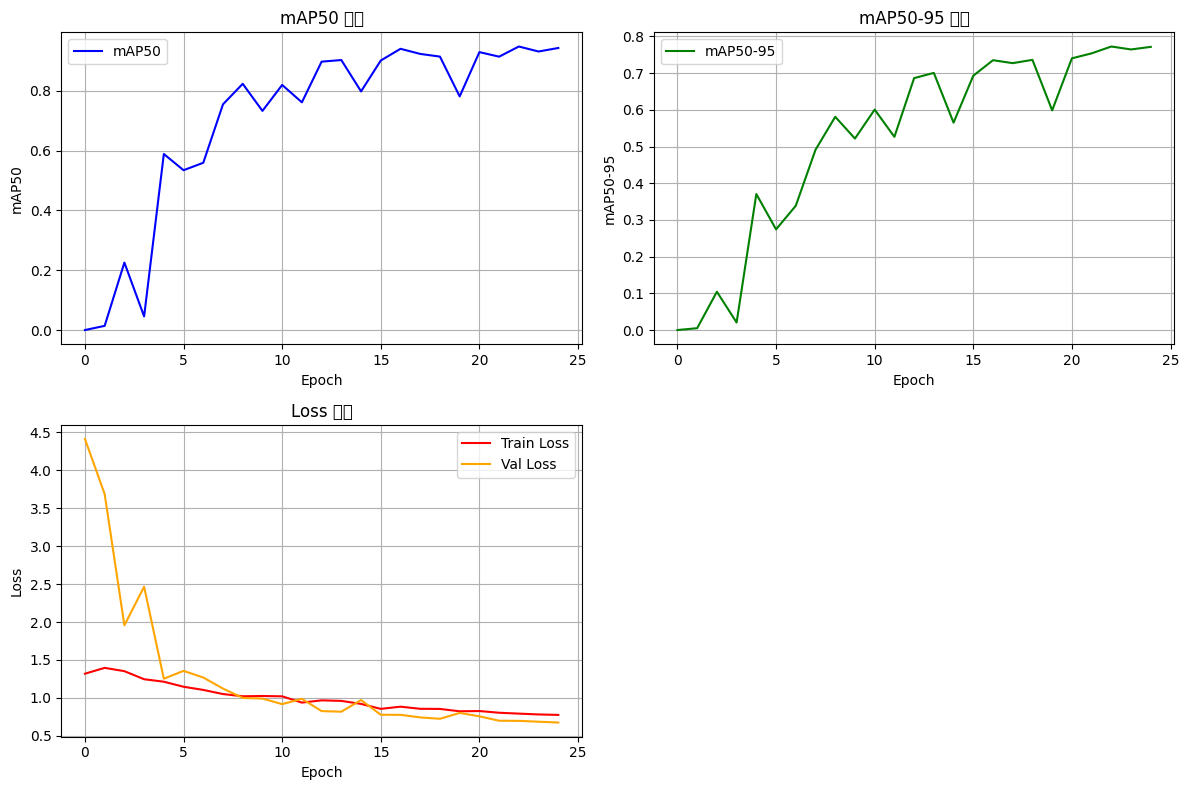

📈 그래프가 저장되었습니다: /content/drive/MyDrive/training_analysis.png


NameError: name 'test_inference' is not defined

In [ ]:
# 학습 곡선도 보고 싶으시면:
plot_training_curves(df)

# 실제 추론 테스트:
test_inference()

In [ ]:
# ===== 학습된 모델 추론 테스트 =====

from ultralytics import YOLO
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def test_inference(image_path=None, confidence=0.25):
    """학습된 모델로 추론 테스트"""
    print(f"🔍 학습된 모델 추론 테스트!")

    # 최고 성능 모델 로드
    best_model_path = '/content/drive/MyDrive/yolo_training_results/tomato_6class_v1/weights/best.pt'

    if not os.path.exists(best_model_path):
        print(f"❌ 모델이 없습니다: {best_model_path}")
        return

    print(f"✅ 모델 로드: {best_model_path}")
    model = YOLO(best_model_path)

    # 테스트 이미지 선택
    if image_path is None:
        # validation 데이터에서 랜덤 선택
        val_dir = "/content/drive/MyDrive/dataset_6class_complete/newpart_03"

        if os.path.exists(val_dir):
            val_images = [f for f in os.listdir(val_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]
            if val_images:
                selected_image = random.choice(val_images)
                image_path = f"{val_dir}/{selected_image}"
                print(f"📷 랜덤 선택된 테스트 이미지: {selected_image}")
            else:
                print(f"❌ validation 이미지가 없습니다.")
                return
        else:
            print(f"❌ validation 디렉토리가 없습니다: {val_dir}")
            return

    print(f"🖼️ 테스트 이미지: {os.path.basename(image_path)}")

    # 추론 실행
    print(f"🚀 추론 실행 중... (confidence={confidence})")
    results = model(image_path, conf=confidence, device=0, verbose=False)

    # 클래스 이름 정의
    class_names = ['정상', '토마토잿빛곰팡이병', '토마토흰가루병', '다량원소결핍(N)', '다량원소결핍(P)', '다량원소결핍(K)']

    # 결과 분석
    print(f"\n📊 추론 결과:")

    result = results[0]

    if result.boxes is not None and len(result.boxes) > 0:
        print(f"✅ {len(result.boxes)}개 객체 검출:")

        for i, box in enumerate(result.boxes):
            class_id = int(box.cls[0])
            confidence_score = float(box.conf[0])
            class_name = class_names[class_id]

            # 바운딩 박스 좌표
            x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()

            print(f"  {i+1}. {class_name}")
            print(f"     신뢰도: {confidence_score:.3f}")
            print(f"     박스: ({x1:.0f}, {y1:.0f}, {x2:.0f}, {y2:.0f})")

    else:
        print(f"❌ 검출된 객체 없음 (confidence={confidence} 기준)")
        print(f"💡 더 낮은 confidence로 다시 시도해보세요:")
        print(f"   test_inference(confidence=0.1)")

    # 결과 이미지 저장
    result_save_path = '/content/drive/MyDrive/inference_result.jpg'

    # 결과 이미지 생성 및 저장
    plotted = result.plot()  # 결과 시각화

    # PIL로 변환 후 저장
    if plotted is not None:
        from PIL import Image
        import numpy as np

        # OpenCV BGR -> RGB 변환
        plotted_rgb = plotted[:, :, ::-1]
        pil_image = Image.fromarray(plotted_rgb)
        pil_image.save(result_save_path)

        print(f"💾 결과 이미지 저장: {result_save_path}")

        # 이미지 표시
        plt.figure(figsize=(12, 8))
        plt.imshow(plotted_rgb)
        plt.axis('off')
        plt.title(f'YOLOv8 Inference Result - {os.path.basename(image_path)}', fontsize=16)
        plt.tight_layout()
        plt.savefig('/content/drive/MyDrive/inference_display.png', dpi=150, bbox_inches='tight')
        plt.show()

        print(f"📈 표시된 결과도 저장됨: /content/drive/MyDrive/inference_display.png")

    return results

def test_multiple_images(num_images=5, confidence=0.25):
    """여러 이미지로 추론 테스트"""
    print(f"🔍 {num_images}개 이미지 추론 테스트!")

    # 모델 로드
    best_model_path = '/content/drive/MyDrive/yolo_training_results/tomato_6class_v1/weights/best.pt'
    model = YOLO(best_model_path)

    # validation 이미지들
    val_dir = "/content/drive/MyDrive/dataset_6class_complete/newpart_03"
    val_images = [f for f in os.listdir(val_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # 랜덤 선택
    selected_images = random.sample(val_images, min(num_images, len(val_images)))

    class_names = ['정상', '토마토잿빛곰팡이병', '토마토흰가루병', '다량원소결핍(N)', '다량원소결핍(P)', '다량원소결핍(K)']

    print(f"\n📊 {len(selected_images)}개 이미지 테스트 결과:")

    detection_summary = {}

    for i, img_name in enumerate(selected_images):
        img_path = f"{val_dir}/{img_name}"

        # 실제 클래스 (파일명에서 추출)
        if img_name.startswith('class'):
            true_class = int(img_name.split('_')[0].replace('class', ''))
            true_class_name = class_names[true_class]
        else:
            true_class_name = "Unknown"

        print(f"\n{i+1}. {img_name}")
        print(f"   실제 클래스: {true_class_name}")

        # 추론 실행
        results = model(img_path, conf=confidence, device=0, verbose=False)
        result = results[0]

        if result.boxes is not None and len(result.boxes) > 0:
            # 가장 높은 신뢰도의 예측
            best_box = result.boxes[0]
            pred_class = int(best_box.cls[0])
            pred_confidence = float(best_box.conf[0])
            pred_class_name = class_names[pred_class]

            print(f"   예측 클래스: {pred_class_name} (신뢰도: {pred_confidence:.3f})")

            # 정확도 체크
            if true_class_name != "Unknown":
                is_correct = (pred_class == true_class)
                print(f"   정확도: {'✅ 맞음' if is_correct else '❌ 틀림'}")

                # 통계 수집
                if true_class_name not in detection_summary:
                    detection_summary[true_class_name] = {'correct': 0, 'total': 0}
                detection_summary[true_class_name]['total'] += 1
                if is_correct:
                    detection_summary[true_class_name]['correct'] += 1
        else:
            print(f"   예측 클래스: 검출 없음")

    # 클래스별 정확도 요약
    if detection_summary:
        print(f"\n📈 클래스별 정확도 요약:")
        overall_correct = 0
        overall_total = 0

        for class_name, stats in detection_summary.items():
            accuracy = stats['correct'] / stats['total'] * 100
            print(f"  {class_name}: {stats['correct']}/{stats['total']} = {accuracy:.1f}%")
            overall_correct += stats['correct']
            overall_total += stats['total']

        overall_accuracy = overall_correct / overall_total * 100
        print(f"\n🎯 전체 정확도: {overall_correct}/{overall_total} = {overall_accuracy:.1f}%")

def test_class_performance():
    """클래스별 성능 상세 테스트"""
    print(f"🎯 클래스별 성능 상세 테스트!")

    # 각 클래스별로 몇 개씩 테스트
    val_dir = "/content/drive/MyDrive/dataset_6class_complete/newpart_03"

    class_names = ['정상', '토마토잿빛곰팡이병', '토마토흰가루병', '다량원소결핍(N)', '다량원소결핍(P)', '다량원소결핍(K)']

    # 클래스별 파일 분류
    class_files = {i: [] for i in range(6)}

    for file in os.listdir(val_dir):
        if file.startswith('class') and file.endswith(('.jpg', '.jpeg', '.png')):
            class_id = int(file.split('_')[0].replace('class', ''))
            class_files[class_id].append(file)

    # 각 클래스별 성능 테스트
    model = YOLO('/content/drive/MyDrive/yolo_training_results/tomato_6class_v1/weights/best.pt')

    print(f"\n📊 클래스별 상세 성능:")

    for class_id, files in class_files.items():
        if not files:
            continue

        class_name = class_names[class_id]
        print(f"\n🔍 {class_name} (클래스 {class_id}):")
        print(f"   테스트 파일 수: {len(files)}개")

        # 몇 개 샘플 테스트
        test_files = files[:min(10, len(files))]  # 최대 10개

        correct = 0
        total = len(test_files)
        confidences = []

        for file in test_files:
            img_path = f"{val_dir}/{file}"
            results = model(img_path, conf=0.1, device=0, verbose=False)

            if results[0].boxes is not None and len(results[0].boxes) > 0:
                pred_class = int(results[0].boxes[0].cls[0])
                confidence = float(results[0].boxes[0].conf[0])

                if pred_class == class_id:
                    correct += 1
                confidences.append(confidence)

        accuracy = correct / total * 100 if total > 0 else 0
        avg_confidence = sum(confidences) / len(confidences) if confidences else 0

        print(f"   정확도: {correct}/{total} = {accuracy:.1f}%")
        print(f"   평균 신뢰도: {avg_confidence:.3f}")

# 실행 가능한 함수들 안내
print("🚀 사용 가능한 추론 테스트 함수들:")
print("1. test_inference()                    # 단일 이미지 테스트")
print("2. test_multiple_images(num_images=5)  # 여러 이미지 테스트")
print("3. test_class_performance()            # 클래스별 성능 테스트")
print("\n바로 실행해보세요!")

🚀 사용 가능한 추론 테스트 함수들:
1. test_inference()                    # 단일 이미지 테스트
2. test_multiple_images(num_images=5)  # 여러 이미지 테스트
3. test_class_performance()            # 클래스별 성능 테스트

바로 실행해보세요!


단일 이미지 테스트
- 이미지(박스플롯+신뢰도+결과)

🔍 학습된 모델 추론 테스트!
✅ 모델 로드: /content/drive/MyDrive/yolo_training_results/tomato_6class_v1/weights/best.pt
📷 랜덤 선택된 테스트 이미지: class0_016.jpg
🖼️ 테스트 이미지: class0_016.jpg
🚀 추론 실행 중... (confidence=0.25)

📊 추론 결과:
✅ 1개 객체 검출:
  1. 정상
     신뢰도: 0.862
     박스: (322, 659, 2533, 3583)
💾 결과 이미지 저장: /content/drive/MyDrive/inference_result.jpg


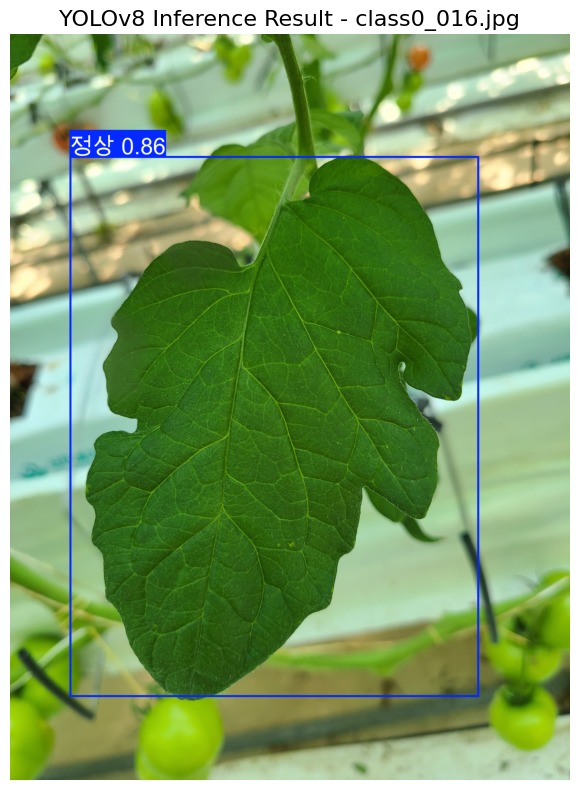

📈 표시된 결과도 저장됨: /content/drive/MyDrive/inference_display.png


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '정상', 1: '토마토잿빛곰팡이병', 2: '토마토흰가루병', 3: '다량원소결핍(N)', 4: '다량원소결핍(P)', 5: '다량원소결핍(K)'}
 obb: None
 orig_img: array([[[ 14, 101,  51],
         [ 17, 104,  54],
         [ 15, 102,  52],
         ...,
         [124, 169, 136],
         [123, 168, 135],
         [120, 165, 132]],
 
        [[ 12, 100,  47],
         [ 13, 100,  50],
         [ 13, 100,  50],
         ...,
         [122, 167, 134],
         [120, 165, 132],
         [118, 163, 130]],
 
        [[ 13,  97,  49],
         [ 13,  97,  49],
         [ 14, 101,  51],
         ...,
         [122, 167, 134],
         [120, 165, 132],
         [122, 167, 134]],
 
        ...,
 
        [[  4, 174, 125],
         [  5, 175, 126],
         [  7, 178, 126],
         ...,
         [175, 201, 177],
         [176, 202, 178],
         [179, 205, 181]],
 
        [[  4, 174, 125],
         [

In [ ]:
test_inference()

5개 이미지 추론 테스트
- 입력 이미지의 클래스 분별 및 신뢰도 제공

In [ ]:
test_multiple_images(num_images=5)

🔍 5개 이미지 추론 테스트!

📊 5개 이미지 테스트 결과:

1. class1_007.jpg
   실제 클래스: 토마토잿빛곰팡이병
   예측 클래스: 토마토잿빛곰팡이병 (신뢰도: 0.775)
   정확도: ✅ 맞음

2. class0_044.jpg
   실제 클래스: 정상
   예측 클래스: 정상 (신뢰도: 0.774)
   정확도: ✅ 맞음

3. class3_044.jpg
   실제 클래스: 다량원소결핍(N)
   예측 클래스: 다량원소결핍(N) (신뢰도: 0.454)
   정확도: ✅ 맞음

4. class1_008.jpg
   실제 클래스: 토마토잿빛곰팡이병
   예측 클래스: 토마토잿빛곰팡이병 (신뢰도: 0.751)
   정확도: ✅ 맞음

5. class5_029.jpg
   실제 클래스: 다량원소결핍(K)
   예측 클래스: 다량원소결핍(K) (신뢰도: 0.954)
   정확도: ✅ 맞음

📈 클래스별 정확도 요약:
  토마토잿빛곰팡이병: 2/2 = 100.0%
  정상: 1/1 = 100.0%
  다량원소결핍(N): 1/1 = 100.0%
  다량원소결핍(K): 1/1 = 100.0%

🎯 전체 정확도: 5/5 = 100.0%


클래스별 성능 상세 테스트
- 테스트 파일 각 클래스마다 10개

In [ ]:
test_class_performance()

🎯 클래스별 성능 상세 테스트!

📊 클래스별 상세 성능:

🔍 정상 (클래스 0):
   테스트 파일 수: 50개
   정확도: 8/10 = 80.0%
   평균 신뢰도: 0.590

🔍 토마토잿빛곰팡이병 (클래스 1):
   테스트 파일 수: 50개
   정확도: 10/10 = 100.0%
   평균 신뢰도: 0.763

🔍 토마토흰가루병 (클래스 2):
   테스트 파일 수: 50개
   정확도: 10/10 = 100.0%
   평균 신뢰도: 0.813

🔍 다량원소결핍(N) (클래스 3):
   테스트 파일 수: 50개
   정확도: 10/10 = 100.0%
   평균 신뢰도: 0.677

🔍 다량원소결핍(P) (클래스 4):
   테스트 파일 수: 50개
   정확도: 8/10 = 80.0%
   평균 신뢰도: 0.640

🔍 다량원소결핍(K) (클래스 5):
   테스트 파일 수: 50개
   정확도: 10/10 = 100.0%
   평균 신뢰도: 0.707


기타 성능 지표 분석
- Accuracy(정확도): 모델이 정답을 맞춘 비율
- Precison(정밀도): 모델의 진단이 얼마나 정밀한지
- Recall(재현율): 모델이 병을 얼마나 빠짐없이 찾아내는지
- F1-Score:정밀도와 재현율

🚀 포괄적 성능 지표 분석을 시작합니다!
이 분석은 5-10분 정도 소요될 수 있습니다...
📊 포괄적 성능 지표 분석 시작!
🔍 전체 validation 데이터 예측 중...
✅ 총 300개 이미지 예측 완료

=== 1. 기본 분류 성능 지표 ===
전체 정확도 (Accuracy): 0.9267 (92.7%)
정밀도 (Precision) - Macro: 0.9375, Weighted: 0.9375
재현율 (Recall) - Macro: 0.9267, Weighted: 0.9267
F1-Score - Macro: 0.9282, Weighted: 0.9282

=== 2. 고급 분류 지표 ===
균형 정확도 (Balanced Accuracy): 0.9267
코헨 카파 (Cohen's Kappa): 0.9120
매튜스 상관계수 (MCC): 0.9140

=== 3. 신뢰도 기반 지표 ===
평균 예측 신뢰도: 0.7281
정확한 예측의 평균 신뢰도: 0.7407
틀린 예측의 평균 신뢰도: 0.5698
신뢰도 차이: 0.1709

신뢰도 구간별 정확도:
  0.0-0.3: 0.750 (4개 샘플)
  0.3-0.5: 0.731 (26개 샘플)
  0.5-0.7: 0.847 (72개 샘플)
  0.7-0.9: 0.989 (174개 샘플)
  0.9-1.0: 0.958 (24개 샘플)

=== 4. 클래스별 상세 성능 ===
클래스별 정밀도, 재현율, F1-Score:

=== 5. 혼동 행렬 분석 ===


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51135 (\N{HANGUL SYLLABLE JAES}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48731 (\N{HANGUL SYLLABLE BIC}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/u

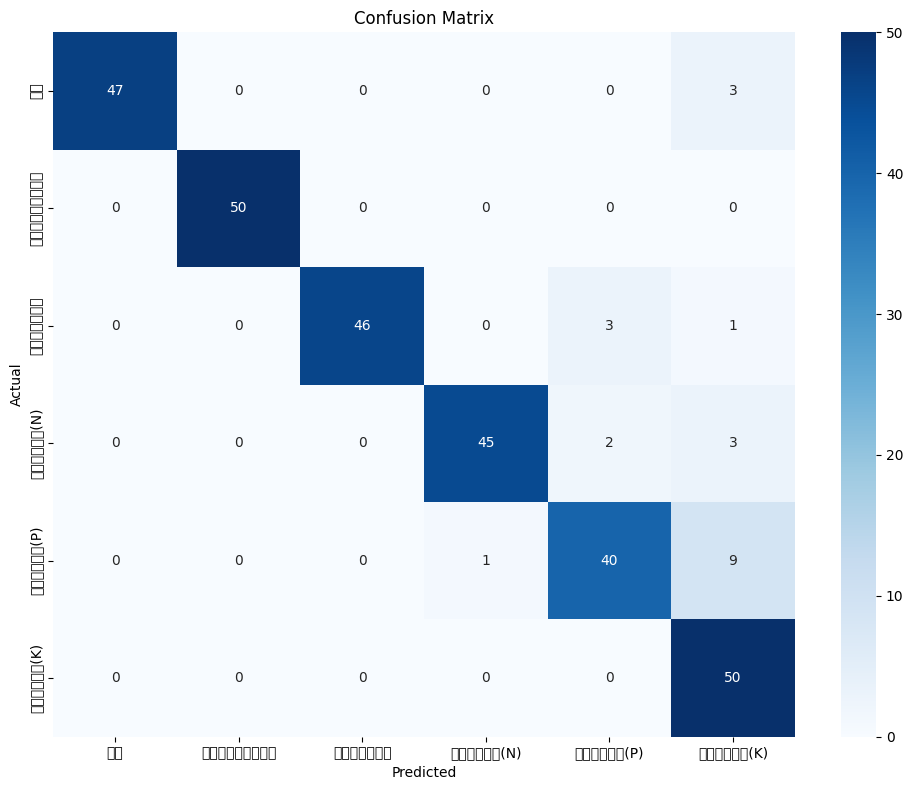

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 53664 (\N{HANGUL SYLLABLE TO}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 47560 (\N{HANGUL SYLLABLE MA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 51135 (\N{HANGUL SYLLABLE JAES}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 48731 (\N{HANGUL SYLLABLE BIC}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/u

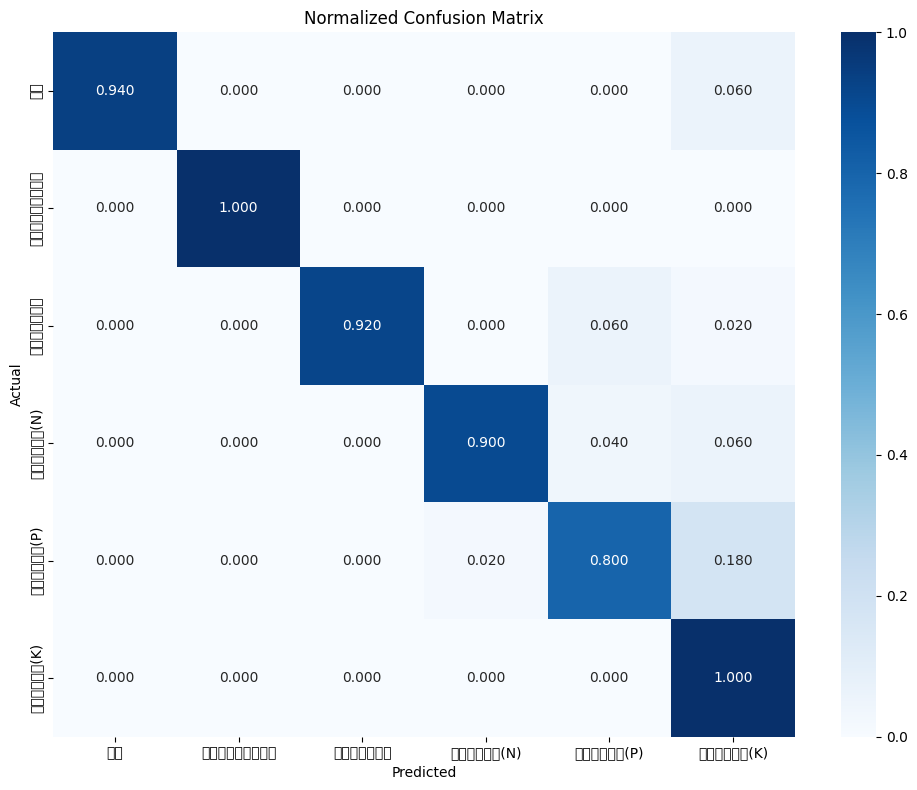

클래스별 주요 오분류:
  정상:
    → 다량원소결핍(K): 3개 (6.0%)
  토마토흰가루병:
    → 다량원소결핍(P): 3개 (6.0%)
    → 다량원소결핍(K): 1개 (2.0%)
  다량원소결핍(N):
    → 다량원소결핍(K): 3개 (6.0%)
    → 다량원소결핍(P): 2개 (4.0%)
  다량원소결핍(P):
    → 다량원소결핍(K): 9개 (18.0%)
    → 다량원소결핍(N): 1개 (2.0%)

=== 6. 추가 성능 지표 ===
Top-2 정확도: 0.9633 (96.3%)
Top-3 정확도: 0.9867 (98.7%)

클래스 분포:
실제 분포 vs 예측 분포:
  정상: 실제 50개, 예측 47개
  토마토잿빛곰팡이병: 실제 50개, 예측 50개
  토마토흰가루병: 실제 50개, 예측 46개
  다량원소결핍(N): 실제 50개, 예측 46개
  다량원소결핍(P): 실제 50개, 예측 45개
  다량원소결핍(K): 실제 50개, 예측 66개

=== 7. 종합 성능 점수 ===
종합 성능 점수: 0.9018 (90.2%)
성능 등급: A급 (90-95%)

📋 성능 요약:
  Overall Accuracy: 0.9267
  F1-Score (Macro): 0.9282
  Balanced Accuracy: 0.9267
  Cohen's Kappa: 0.9120
  Matthews CC: 0.9140
  Average Confidence: 0.7281
  Composite Score: 0.9018


In [ ]:
# ===== 포괄적 성능 지표 분석 =====

from ultralytics import YOLO
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score
from sklearn.metrics import balanced_accuracy_score, f1_score, matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
import os

def comprehensive_metrics_analysis():
    """포괄적 성능 지표 분석"""
    print("📊 포괄적 성능 지표 분석 시작!")

    # 모델 로드
    best_model_path = '/content/drive/MyDrive/yolo_training_results/tomato_6class_v1/weights/best.pt'
    model = YOLO(best_model_path)

    # Validation 데이터 전체 테스트
    val_dir = "/content/drive/MyDrive/dataset_6class_complete/newpart_03"

    class_names = ['정상', '토마토잿빛곰팡이병', '토마토흰가루병', '다량원소결핍(N)', '다량원소결핍(P)', '다량원소결핍(K)']

    # 전체 validation 데이터에 대해 예측
    print("🔍 전체 validation 데이터 예측 중...")

    true_labels = []
    pred_labels = []
    pred_confidences = []
    pred_all_confidences = []  # 모든 클래스에 대한 신뢰도

    # 클래스별 파일 수집
    val_files = [f for f in os.listdir(val_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    for file in val_files:
        if file.startswith('class'):
            # 실제 클래스
            true_class = int(file.split('_')[0].replace('class', ''))
            true_labels.append(true_class)

            # 예측
            img_path = f"{val_dir}/{file}"
            results = model(img_path, conf=0.001, device=0, verbose=False)  # 낮은 threshold

            if results[0].boxes is not None and len(results[0].boxes) > 0:
                # 가장 높은 신뢰도 예측
                best_box = results[0].boxes[0]
                pred_class = int(best_box.cls[0])
                confidence = float(best_box.conf[0])

                pred_labels.append(pred_class)
                pred_confidences.append(confidence)

                # 모든 박스의 신뢰도 수집 (다중 클래스 신뢰도 분석용)
                all_confs = [0.0] * 6  # 6개 클래스 초기화
                for box in results[0].boxes:
                    cls_id = int(box.cls[0])
                    conf = float(box.conf[0])
                    all_confs[cls_id] = max(all_confs[cls_id], conf)  # 최대 신뢰도 사용

                pred_all_confidences.append(all_confs)
            else:
                # 검출 없음 - 가장 가능성 높은 클래스로 임의 배정
                pred_labels.append(0)  # 정상으로 기본값
                pred_confidences.append(0.001)
                pred_all_confidences.append([0.001] + [0.0] * 5)

    print(f"✅ 총 {len(true_labels)}개 이미지 예측 완료")

    # ===========================================
    # 1. 기본 분류 성능 지표
    # ===========================================
    print(f"\n=== 1. 기본 분류 성능 지표 ===")

    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

    # 전체 정확도
    overall_accuracy = accuracy_score(true_labels, pred_labels)
    print(f"전체 정확도 (Accuracy): {overall_accuracy:.4f} ({overall_accuracy*100:.1f}%)")

    # 클래스별 정밀도, 재현율, F1-score
    precision_macro = precision_score(true_labels, pred_labels, average='macro')
    recall_macro = recall_score(true_labels, pred_labels, average='macro')
    f1_macro = f1_score(true_labels, pred_labels, average='macro')

    precision_weighted = precision_score(true_labels, pred_labels, average='weighted')
    recall_weighted = recall_score(true_labels, pred_labels, average='weighted')
    f1_weighted = f1_score(true_labels, pred_labels, average='weighted')

    print(f"정밀도 (Precision) - Macro: {precision_macro:.4f}, Weighted: {precision_weighted:.4f}")
    print(f"재현율 (Recall) - Macro: {recall_macro:.4f}, Weighted: {recall_weighted:.4f}")
    print(f"F1-Score - Macro: {f1_macro:.4f}, Weighted: {f1_weighted:.4f}")

    # ===========================================
    # 2. 고급 분류 지표
    # ===========================================
    print(f"\n=== 2. 고급 분류 지표 ===")

    # 균형 정확도 (Balanced Accuracy)
    balanced_acc = balanced_accuracy_score(true_labels, pred_labels)
    print(f"균형 정확도 (Balanced Accuracy): {balanced_acc:.4f}")

    # 코헨 카파 계수 (Cohen's Kappa) - 클래스 불균형 고려
    kappa = cohen_kappa_score(true_labels, pred_labels)
    print(f"코헨 카파 (Cohen's Kappa): {kappa:.4f}")

    # 매튜스 상관계수 (Matthews Correlation Coefficient)
    mcc = matthews_corrcoef(true_labels, pred_labels)
    print(f"매튜스 상관계수 (MCC): {mcc:.4f}")

    # ===========================================
    # 3. 신뢰도 기반 지표
    # ===========================================
    print(f"\n=== 3. 신뢰도 기반 지표 ===")

    # 평균 신뢰도
    avg_confidence = np.mean(pred_confidences)
    print(f"평균 예측 신뢰도: {avg_confidence:.4f}")

    # 정확한 예측의 평균 신뢰도 vs 틀린 예측의 평균 신뢰도
    correct_confidences = [conf for i, conf in enumerate(pred_confidences)
                          if true_labels[i] == pred_labels[i]]
    incorrect_confidences = [conf for i, conf in enumerate(pred_confidences)
                            if true_labels[i] != pred_labels[i]]

    if correct_confidences:
        avg_correct_conf = np.mean(correct_confidences)
        print(f"정확한 예측의 평균 신뢰도: {avg_correct_conf:.4f}")

    if incorrect_confidences:
        avg_incorrect_conf = np.mean(incorrect_confidences)
        print(f"틀린 예측의 평균 신뢰도: {avg_incorrect_conf:.4f}")
        print(f"신뢰도 차이: {avg_correct_conf - avg_incorrect_conf:.4f}")

    # 신뢰도별 정확도 분석
    confidence_ranges = [(0.0, 0.3), (0.3, 0.5), (0.5, 0.7), (0.7, 0.9), (0.9, 1.0)]
    print(f"\n신뢰도 구간별 정확도:")

    for low, high in confidence_ranges:
        indices = [i for i, conf in enumerate(pred_confidences) if low <= conf < high]
        if indices:
            range_accuracy = sum(1 for i in indices if true_labels[i] == pred_labels[i]) / len(indices)
            print(f"  {low:.1f}-{high:.1f}: {range_accuracy:.3f} ({len(indices)}개 샘플)")

    # ===========================================
    # 4. 클래스별 상세 성능
    # ===========================================
    print(f"\n=== 4. 클래스별 상세 성능 ===")

    # Classification Report
    report = classification_report(true_labels, pred_labels,
                                 target_names=class_names,
                                 output_dict=True)

    print("클래스별 정밀도, 재현율, F1-Score:")
    for i, class_name in enumerate(class_names):
        if str(i) in report:
            precision = report[str(i)]['precision']
            recall = report[str(i)]['recall']
            f1 = report[str(i)]['f1-score']
            support = report[str(i)]['support']
            print(f"  {class_name}:")
            print(f"    정밀도: {precision:.3f}, 재현율: {recall:.3f}, F1: {f1:.3f} (샘플: {support}개)")

    # ===========================================
    # 5. 혼동 행렬 (Confusion Matrix)
    # ===========================================
    print(f"\n=== 5. 혼동 행렬 분석 ===")

    cm = confusion_matrix(true_labels, pred_labels)

    # 혼동 행렬 시각화
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/confusion_matrix.png', dpi=150, bbox_inches='tight')
    plt.show()

    # 정규화된 혼동 행렬
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_normalized, annot=True, fmt='.3f', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.title('Normalized Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/confusion_matrix_normalized.png', dpi=150, bbox_inches='tight')
    plt.show()

    # 클래스별 오분류 분석
    print("클래스별 주요 오분류:")
    for i, true_class in enumerate(class_names):
        row = cm[i]
        total = row.sum()
        if total > 0:
            # 가장 많이 오분류된 클래스들
            misclassified = [(j, count) for j, count in enumerate(row) if j != i and count > 0]
            misclassified.sort(key=lambda x: x[1], reverse=True)

            if misclassified:
                print(f"  {true_class}:")
                for pred_idx, count in misclassified[:2]:  # 상위 2개만
                    percentage = count / total * 100
                    print(f"    → {class_names[pred_idx]}: {count}개 ({percentage:.1f}%)")

    # ===========================================
    # 6. 추가 지표들
    # ===========================================
    print(f"\n=== 6. 추가 성능 지표 ===")

    # Top-2, Top-3 정확도 (다중 예측 고려)
    if pred_all_confidences:
        top2_correct = 0
        top3_correct = 0

        for i, (true_label, all_confs) in enumerate(zip(true_labels, pred_all_confidences)):
            # 신뢰도 순으로 정렬
            sorted_indices = np.argsort(all_confs)[::-1]

            if true_label in sorted_indices[:2]:
                top2_correct += 1
            if true_label in sorted_indices[:3]:
                top3_correct += 1

        top2_accuracy = top2_correct / len(true_labels)
        top3_accuracy = top3_correct / len(true_labels)

        print(f"Top-2 정확도: {top2_accuracy:.4f} ({top2_accuracy*100:.1f}%)")
        print(f"Top-3 정확도: {top3_accuracy:.4f} ({top3_accuracy*100:.1f}%)")

    # 클래스 불균형 정도
    from collections import Counter
    true_counts = Counter(true_labels)
    pred_counts = Counter(pred_labels)

    print(f"\n클래스 분포:")
    print("실제 분포 vs 예측 분포:")
    for i, class_name in enumerate(class_names):
        true_count = true_counts.get(i, 0)
        pred_count = pred_counts.get(i, 0)
        print(f"  {class_name}: 실제 {true_count}개, 예측 {pred_count}개")

    # ===========================================
    # 7. 종합 점수
    # ===========================================
    print(f"\n=== 7. 종합 성능 점수 ===")

    # 가중 종합 점수 계산
    weights = {
        'accuracy': 0.25,
        'f1_macro': 0.25,
        'balanced_accuracy': 0.20,
        'mcc': 0.15,
        'avg_confidence': 0.15
    }

    # 0-1 범위로 정규화
    normalized_scores = {
        'accuracy': overall_accuracy,
        'f1_macro': f1_macro,
        'balanced_accuracy': balanced_acc,
        'mcc': (mcc + 1) / 2,  # MCC는 -1~1 범위이므로 0~1로 변환
        'avg_confidence': avg_confidence
    }

    composite_score = sum(weights[key] * normalized_scores[key] for key in weights)

    print(f"종합 성능 점수: {composite_score:.4f} ({composite_score*100:.1f}%)")
    print(f"성능 등급: {'S급 (95%+)' if composite_score >= 0.95 else 'A급 (90-95%)' if composite_score >= 0.90 else 'B급 (80-90%)' if composite_score >= 0.80 else 'C급 (70-80%)' if composite_score >= 0.70 else 'D급 (<70%)'}")

    # 성능 요약 저장
    summary = {
        'Overall Accuracy': f"{overall_accuracy:.4f}",
        'F1-Score (Macro)': f"{f1_macro:.4f}",
        'Balanced Accuracy': f"{balanced_acc:.4f}",
        'Cohen\'s Kappa': f"{kappa:.4f}",
        'Matthews CC': f"{mcc:.4f}",
        'Average Confidence': f"{avg_confidence:.4f}",
        'Composite Score': f"{composite_score:.4f}"
    }

    return summary, cm, report

# 실행
print("🚀 포괄적 성능 지표 분석을 시작합니다!")
print("이 분석은 5-10분 정도 소요될 수 있습니다...")

summary, confusion_matrix_result, classification_report_result = comprehensive_metrics_analysis()

print(f"\n📋 성능 요약:")
for metric, value in summary.items():
    print(f"  {metric}: {value}")